t1 =  9.9706
t2 =  0.079428


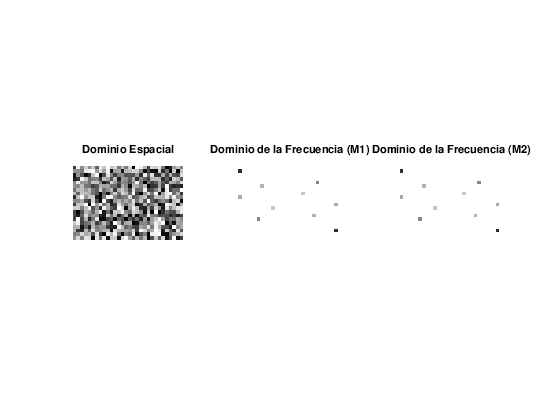

In [1]:
clc; clear; close all
m = 20;
n = 30;
A = rand(m,n);
subplot(1,3,1)
imshow(A)
title('Dominio Espacial')

tic

F = zeros(m,n);
for u = 1:m
  for v = 1:n
    for x = 0:m-1
      for y = 0:n-1
        F(u,v) = F(u,v) + A(x+1,y+1)*exp(-1i*2*pi*(u*x/m + v*y/n));
      end
    end
  end
end
subplot(1,3,2)
imshow(abs(F))
title('Dominio de la Frecuencia (M1)')
t1=toc

tic
aux=fft2(A);
F1=[];
for j =1:m
  F1(j,:) = flip(aux(m-j+1,:)');
  
end
t2=toc
subplot(1,3,3)
imshow(abs(F1))
title('Dominio de la Frecuencia (M2)')

1.5687477588653564
0.0


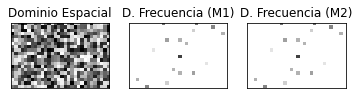

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from scipy import fft
import time

m = 20
n = 30

A = np.random.rand(m,n)*255

A_Im = Image.fromarray(A)

F = np.zeros((m,n),dtype = 'complex_');

start = time.time()
for u in range(0,m):
    for v in range(0,n):
        for x in range(0,m):
            for y in range(0,n):
                F[u,v] = F[u,v] + A[x,y]*np.exp(-1j*2*np.pi*((u )*x/m + (v )*y/n))                

end = time.time()
print(end - start)
F_Im1 = Image.fromarray(np.absolute(F))

start = time.time()
F = fft.fft2(A)
end = time.time()
print(end - start)
F_Im2 = Image.fromarray(np.absolute(F))

images =[]
fig, axs = plt.subplots(1, 3)
axs[0].set_title('Dominio Espacial')
axs[1].set_title('D. Frecuencia (M1)')
axs[2].set_title('D. Frecuencia (M2)')
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[2].set_xticks([])
axs[0].set_yticks([])
axs[1].set_yticks([])
axs[2].set_yticks([])
images.append(axs[0].imshow(A_Im,cmap = 'gray'))
images.append(axs[1].imshow(F_Im1,cmap = 'gray'))
images.append(axs[2].imshow(F_Im2,cmap = 'gray'))

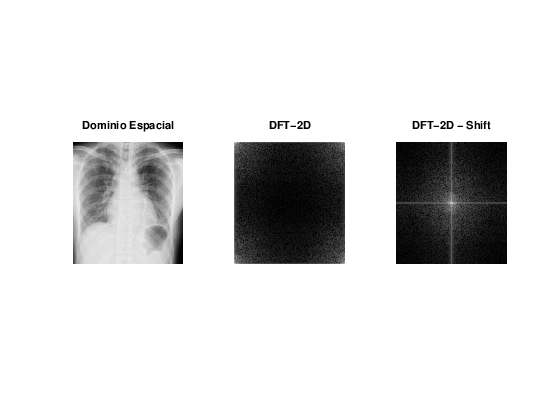

In [27]:
clc; clear; close all
pkg load image

A = imread('Imagenes 7/chest.jpg');
subplot(1,3,1)
imshow(A)
title('Dominio Espacial')

A = im2double(A);

F=fft2(A);
subplot(1,3,2)
imshow(log(1+abs(F)),[])
title('DFT-2D')

F_shift = fftshift(F);
subplot(1,3,3)
imshow(log(1+abs(F_shift)),[])

title('DFT-2D - Shift')

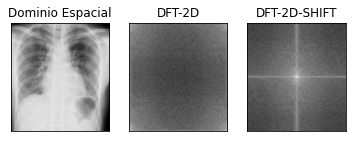

In [64]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from scipy import fft


A = Image.open('Imagenes 7/chest.jpg')
A_arr = np.asarray(A).astype('float64')
m,n,r = A_arr.shape

F = np.zeros((m,n),dtype = 'complex_')

F = fft.fft2(A_arr[:,:,0])


F = np.clip(np.log(1 + np.absolute(F)), 0, 255)
F_1 = Image.fromarray(F.astype('uint8'))

F = fft.fftshift(F)
F_2 = Image.fromarray(F.astype('uint8'))

images =[]
fig, axs = plt.subplots(1, 3)
axs[0].set_title('Dominio Espacial')
axs[1].set_title('DFT-2D')
axs[2].set_title('DFT-2D-SHIFT')
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[2].set_xticks([])
axs[0].set_yticks([])
axs[1].set_yticks([])
axs[2].set_yticks([])
images.append(axs[0].imshow(A,cmap = 'gray'))
images.append(axs[1].imshow(F_1,cmap = 'gray'))
images.append(axs[2].imshow(F_2,cmap = 'gray'))

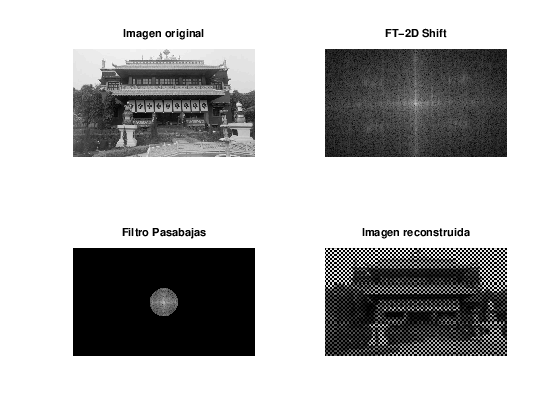

In [24]:
clc; clear; close all
pkg load image

A = imread('Imagenes 7/edificio_china.jpg');
subplot(2,2,1)
imshow(A)
title('Imagen original')

A = im2double(A);
F=fft2(A);
F = fftshift(F);
subplot(2,2,2)
imshow(log(1+abs(F)),[])
title('FT-2D Shift')


[m,n] = size(A);
D = zeros(m,n);
for x=1:m
  for y= 1:n
    D(x,y) = sqrt(x^2+y^2);
  end
end
D = fftshift(D);
D0 = 50;
F_B = (D<=D0);
F_B =F_B + flip(F_B);
F_B =F_B + flip(F_B,2);
H=F.*F_B;
subplot(2,2,3)
imshow(log(1+abs(H)),[])
title('Filtro Pasabajas')


A_r = ifft2(H);
subplot(2,2,4)
imshow(real(A_r))
title('Imagen reconstruida')

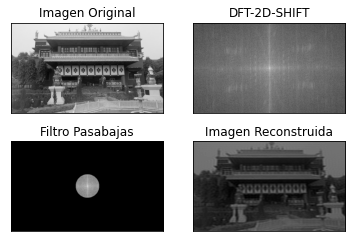

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from scipy import fft


A = Image.open('Imagenes 7/edificio_china.jpg')
A_arr = np.asarray(A).astype('float64')
m,n,r = A_arr.shape

F = np.zeros((m,n),dtype = 'complex_')
D = np.zeros((m,n),dtype = 'complex_')
A_r = np.zeros((m,n),dtype = 'complex_')

F = fft.fft2(A_arr[:,:,0])
F = fft.fftshift(F)
Fshift = np.clip(np.log(1 + np.absolute(F)), 0, 255)

F_1 = Image.fromarray(Fshift.astype('uint8'))

for x in range(0,m):
    for y in range(0,n):
        D[x,y]=np.sqrt((x+1)**2+(y+1)**2)
D = fft.fftshift(D)
D0 = 50
F_B = np.where(D <= D0, 1, 0)

F_B = F_B + np.flip(F_B)
F_B = F_B + np.flip(F_B,1)

H = F_B*F
H_Im = Image.fromarray(np.clip(np.log(1 + np.absolute(H)), 0, 255).astype('uint8'))


A_r = fft.ifft2(H)

A_rIm = Image.fromarray(np.clip(np.real(A_r),0,255).astype('uint8'))

images =[]
fig, axs = plt.subplots(2, 2)
axs[0][0].set_title('Imagen Original')
axs[0][1].set_title('DFT-2D-SHIFT')
axs[1][0].set_title('Filtro Pasabajas')
axs[1][1].set_title('Imagen Reconstruida')
axs[0][0].set_xticks([])
axs[0][1].set_xticks([])
axs[1][0].set_xticks([])
axs[1][1].set_xticks([])
axs[0][0].set_yticks([])
axs[0][1].set_yticks([])
axs[1][0].set_yticks([])
axs[1][1].set_yticks([])
images.append(axs[0][0].imshow(A,cmap = 'gray'))
images.append(axs[0][1].imshow(F_1,cmap = 'gray'))
images.append(axs[1][0].imshow(H_Im,cmap = 'gray'))
images.append(axs[1][1].imshow(A_rIm,cmap = 'gray'))